## Задание 8
Таблица вероятностей того, что эмпирический эксцесс, вычисленный по случайной выборке объема $n$ из стандартного нормального распределения, окажется больше эмпирического эксцесса дневной логарифмической доходности, рассчитанного для каждой из 5 компаний варианта по $n + 1$ последним торговым дням календарного года (для каждого года за весь период). Загрузите найденные в предыдущем пункте квантили в вектор qs. Затем найдите искомую матрицу вероятностей, используя эмпирическое распределение вектора qs.

In [8]:
# время выполнения 12.6176 s
import IPython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as st
from math import floor
from collections import Counter

In [9]:
%%javascript
var k = IPython.notebook.kernel;
k.execute('this_nb_name_ext = "' + IPython.notebook.notebook_name + '"');

<IPython.core.display.Javascript object>

In [10]:
# 8
# некоторые вспомогательные функии
def thisfname(): #Имя этого блокнота
    this_notebook_name = os.path.splitext(this_nb_name_ext)[0]
    return this_notebook_name

# фильтрует по дате
def date_filter(csvtab, year):
    csvtab['<DATE>'] = pd.to_datetime(csvtab['<DATE>'], format='%Y%m%d')
    return csvtab[(csvtab['<DATE>']>=datetime(year, 1, 1)) & (csvtab['<DATE>']<datetime(year + 1, 1, 1))]

# survival function
def data_Sf(data, csvtab_prob, g):
    prob = []
    data = data.reset_index()
    namecol = list(csvtab_prob.columns)
    for i in range(data.shape[0]):
        stack = 0
        for k in range(csvtab_prob.shape[1]):
            if data.loc[i][g] < float(namecol[k]):
                stack += csvtab_prob.loc[0][namecol[k]]
        prob.append(round(stack, 1))
    return prob   

# преобразлвание в latex таблицу
def _repr_latex_(self):
    return r'\scalebox{0.7}{\tabcolsep=0.11cm\centering{%s}}' % self.to_latex()

pd.set_option('display.notebook_repr_html', True)
pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [11]:
V = 1 # вариант 1
n = 240 - 5*V # 235
# чтение файла с квантилями
file = 'C:/Users/timha/OneDrive/Рабочий стол/лаба/' # путь к файлам
qs = pd.read_csv('C:/Users/timha/' + 'Lab_Python_task_7.Вектор 1000 квантилей по выборке объема n=235.csv', sep=';', decimal=',', engine='python', names = ['val']) # чтение файла
qs = qs.loc[1:]
tickers = ['AKRN', 'APTK', 'CHMK', 'LKOH', 'SBER'] # Тикеры
years = range(2000, 2019) # дата
zer0 = pd.DataFrame(np.zeros((len(tickers), len(years))), columns = years) # матрица размером len(tickers) x len(years)
for i in range(len(tickers)):
    ticDF = []
    Newtab = pd.read_csv(file + tickers[i] + '.txt', decimal='.', sep=',', engine='python')
    for k in range(len(years)):
        newtab = date_filter(Newtab, years[k])
        table = newtab['<CLOSE>']
        if table.shape[0] < n: 
            ticDF.append(-10) # устанавливаем значение не 0 так как при X > a возникнут проблемы
            continue
        log = np.log(table.divide(table.shift(+1))) # логарифмическая доходность
        log = log.dropna() # удаление NaN
        End_year = log.tail(n) # последние n элементов
        ticDF.append(st.kurtosis(End_year, fisher=True)) # подсчёт эксцесса и заполнение zer0
    zer0.loc[i][:] = pd.Series(ticDF)
csvtab_prob = pd.DataFrame(Counter(qs['val']), index=[0])/qs.shape[0] # распределение относительных частот
# survival function
for i in range(len(tickers)):
    zer0.loc[i] = data_Sf(zer0.loc[i], csvtab_prob, i)
zer0.set_index([tickers], inplace = True)
zer0

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
AKRN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APTK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHMK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LKOH,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0
SBER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0


In [12]:
zer0.to_csv(thisfname() + ".Табл p-values.csv", index=True, decimal=',', sep=';', encoding='utf-8-sig')

## Задание 9
Гистограмма полученных в предыдущем пункте вероятностей.

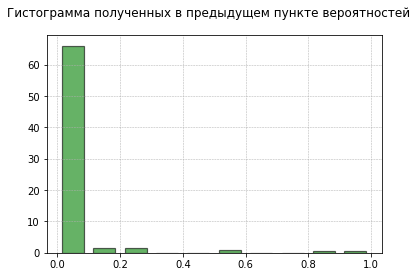

In [13]:
# 9 
# переводит таблицу в вектор без 1
def not_more1(vector):
    one_list = []
    for i in range(len(vector)):
        for k in range(len(vector[0])):
            if vector[i][k] < 1:
                one_list.append(vector[i][k])
    return one_list
            
# переведём таблицу в вектор без 1
vector = pd.DataFrame(not_more1(zer0.values.tolist()))
# считаем интервал
interval = np.arange(0, 1.1, 0.1)
interval[0] -= 0.1 # для включения нижней границы
interval[len(interval) - 1] += 0.1
# интрервал в одном случае попал в другом нет
new_1 = np.array(pd.cut(vector[0], interval, right = False).value_counts(sort = False))
new_2 = np.array(pd.cut(vector[0], interval, right = True).value_counts(sort = False))
new_3 = (new_1 + new_2)/2
x = np.arange(0.05, 1.05, 0.1)
# строим bar т.к. bins в hist не правильно считает кол-во попаданий
plt.bar(x, new_3, 0.07, color = 'green', alpha = 0.6, edgecolor='black', linewidth = 1.2, align='center')
plt.grid(linestyle='--', linewidth=0.5)
plt.suptitle('Гистограмма полученных в предыдущем пункте вероятностей')
plt.show()